In [50]:
import numpy	as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

In [51]:
datos = pd.read_csv('data.csv')
magnitud = datos.iloc[:, 0]
funcionlum = datos.iloc[:, 1]

In [52]:
def	schechter(x,M,phi,alpha):
				m = 0.4*np.log(10)*phi*(10**(-0.4*(x-M)*(alpha+1)))*np.exp(-10**(-0.4*(x-M)))
				return m

In [53]:
x, M, phi, alpha = sp.symbols('x M phi alpha')
m_sympy = 0.4*sp.log(10)*phi*(10**(-0.4*(x-M)*(alpha+1)))*sp.exp(-10**(-0.4*(x-M)))
derivadaM = sp.diff(m_sympy, M)
derivadaphi = sp.diff(m_sympy, phi)
derivadaalpha = sp.diff(m_sympy, alpha)
print(derivadaM)
print(derivadaphi)
print(derivadaalpha)

-0.16*10**((0.4*M - 0.4*x)*(alpha + 1))*10**(0.4*M - 0.4*x)*phi*exp(-10**(0.4*M - 0.4*x))*log(10)**2 + 0.4*10**((0.4*M - 0.4*x)*(alpha + 1))*phi*(0.4*alpha + 0.4)*exp(-10**(0.4*M - 0.4*x))*log(10)**2
0.4*10**((0.4*M - 0.4*x)*(alpha + 1))*exp(-10**(0.4*M - 0.4*x))*log(10)
0.4*10**((0.4*M - 0.4*x)*(alpha + 1))*phi*(0.4*M - 0.4*x)*exp(-10**(0.4*M - 0.4*x))*log(10)**2


In [54]:
fiducial_M = -20.83
fiducial_phi = 1.46e-2
fiducial_alpha = -1.2

alphamin = fiducial_alpha*(1+0.1)
alphamax = fiducial_alpha*(1-0.1)
Mmin = fiducial_M*(1+0.1)
Mmax = fiducial_M*(1-0.1)
phimin = fiducial_phi*(1-0.2)
phimax = fiducial_phi*(1+0.2)
print(alphamin, alphamax, Mmin, Mmax, phimin, phimax)

def loglike(x, y, M, phi, alpha, sigma):
				m = schechter(x, M, phi, alpha)
				L = -(1/2) * np.sum(((y - m) / sigma) ** 2)
				return L

bordeinferr =	np.array([Mmin, phimin, alphamin])
bordesuperr = np.array([Mmax, phimax, alphamax])

def priors(params):
	if np.all(bordeinferr <= params) and np.all(params <= bordesuperr):
		return 0
	else:
		return -np.inf
	

def post(x, y, M, phi, alpha, sigma):
	params = np.array([M, phi, alpha])
	prior_prob = priors(params)
	return loglike(x, y, M, phi, alpha, sigma) + prior_prob


def normM(M):
    return (M - Mmin) / ( Mmax - Mmin)

def anti_normM(M):
				return (M * (Mmax - Mmin)) + Mmin

def normphi(phi):
				return (phi - phimin) / (phimax - phimin)

def anti_normphi(phi):
				return (phi * (phimax - phimin)) + phimin

def normalpha(alpha):
				return (alpha - alphamin) / (alphamax - alphamin)

def anti_normalpha(alpha):
				return (alpha * (alphamax - alphamin)) + alphamin

-1.32 -1.08 -22.913 -18.747 0.011680000000000001 0.01752


In [55]:
def diffM(x,	M, phi, alpha):
				return -0.16*10**((0.4*M - 0.4*x)*(alpha + 1))*10**(0.4*M - 0.4*x)*phi*np.exp(-10**(0.4*M - 0.4*x))*np.log(10)**2 + 0.4*10**((0.4*M - 0.4*x)*(alpha + 1))*phi*(0.4*alpha + 0.4)*np.exp(-10**(0.4*M - 0.4*x))*np.log(10)**2


def diffphi(x,	M, phi, alpha):
				return 0.4*10**((0.4*M - 0.4*x)*(alpha + 1))*np.exp(-10**(0.4*M - 0.4*x))*np.log(10)

def diffalpha(x,	M, phi, alpha):
				return 0.4*10**((0.4*M - 0.4*x)*(alpha + 1))*phi*(0.4*M - 0.4*x)*np.exp(-10**(0.4*M - 0.4*x))*np.log(10)**2

def gradiente(x, M, phi, alpha, sigma):
				grad = np.zeros(3)
				grad[0] = -2*np.sum((funcionlum-schechter(magnitud, M, phi, alpha))*diffM(magnitud, M, phi, alpha)/(sigma**2))
				grad[1] = -2*np.sum((funcionlum-schechter(magnitud, M, phi, alpha))*diffphi(magnitud, M, phi, alpha)/(sigma**2))
				grad[2] = -2*np.sum((funcionlum-schechter(magnitud, M, phi, alpha))*diffalpha(magnitud, M, phi, alpha)/(sigma**2))
				return grad

In [56]:
derivadaM2da = sp.diff(sp.diff(m_sympy, M),M)
derivadaphi2da = sp.diff(sp.diff(m_sympy, phi),phi)
derivadaalpha2da = sp.diff(sp.diff(m_sympy, alpha),alpha)
print(derivadaM2da)
print(derivadaphi2da)
print(derivadaalpha2da)

-0.32*10**((0.4*M - 0.4*x)*(alpha + 1))*10**(0.4*M - 0.4*x)*phi*(0.4*alpha + 0.4)*exp(-10**(0.4*M - 0.4*x))*log(10)**3 - 0.064*10**((0.4*M - 0.4*x)*(alpha + 1))*10**(0.4*M - 0.4*x)*phi*exp(-10**(0.4*M - 0.4*x))*log(10)**3 + 0.064*10**((0.4*M - 0.4*x)*(alpha + 1))*10**(0.8*M - 0.8*x)*phi*exp(-10**(0.4*M - 0.4*x))*log(10)**3 + 0.4*10**((0.4*M - 0.4*x)*(alpha + 1))*phi*(0.16*(alpha + 1)**2)*exp(-10**(0.4*M - 0.4*x))*log(10)**3
0
0.4*10**((0.4*M - 0.4*x)*(alpha + 1))*phi*(0.16*(M - x)**2)*exp(-10**(0.4*M - 0.4*x))*log(10)**3


In [57]:
derivadaMphi	= sp.diff(sp.diff(m_sympy, M),phi)
derivadaMalpha = sp.diff(sp.diff(m_sympy, M),alpha)
derivadaphialpha = sp.diff(sp.diff(m_sympy, phi),alpha)
print(derivadaMphi)
print(derivadaMalpha)
print(derivadaphialpha)

-0.16*10**((0.4*M - 0.4*x)*(alpha + 1))*10**(0.4*M - 0.4*x)*exp(-10**(0.4*M - 0.4*x))*log(10)**2 + 0.4*10**((0.4*M - 0.4*x)*(alpha + 1))*(0.4*alpha + 0.4)*exp(-10**(0.4*M - 0.4*x))*log(10)**2
-0.16*10**((0.4*M - 0.4*x)*(alpha + 1))*10**(0.4*M - 0.4*x)*phi*(0.4*M - 0.4*x)*exp(-10**(0.4*M - 0.4*x))*log(10)**3 + 0.4*10**((0.4*M - 0.4*x)*(alpha + 1))*phi*(0.4*M - 0.4*x)*(0.4*alpha + 0.4)*exp(-10**(0.4*M - 0.4*x))*log(10)**3 + 0.16*10**((0.4*M - 0.4*x)*(alpha + 1))*phi*exp(-10**(0.4*M - 0.4*x))*log(10)**2
0.4*10**((0.4*M - 0.4*x)*(alpha + 1))*(0.4*M - 0.4*x)*exp(-10**(0.4*M - 0.4*x))*log(10)**2


In [58]:
def diff2M(x, M, phi,alpha):
    return -0.32*10**((0.4*M - 0.4*x)*(alpha + 1))*10**(0.4*M - 0.4*x)*phi*(0.4*alpha + 0.4)*np.exp(-10**(0.4*M - 0.4*x))*np.log(10)**3 - 0.064*10**((0.4*M - 0.4*x)*(alpha + 1))*10**(0.4*M - 0.4*x)*phi*np.exp(-10**(0.4*M - 0.4*x))*np.log(10)**3 + 0.064*10**((0.4*M - 0.4*x)*(alpha + 1))*10**(0.8*M - 0.8*x)*phi*np.exp(-10**(0.4*M - 0.4*x))*np.log(10)**3 + 0.4*10**((0.4*M - 0.4*x)*(alpha + 1))*phi*(0.16*(alpha + 1)**2)*np.exp(-10**(0.4*M - 0.4*x))*np.log(10)**3

def diff2alpha(x, M, phi,alpha):
				return 0.4*10**((0.4*M - 0.4*x)*(alpha + 1))*phi*(0.16*(M - x)**2)*np.exp(-10**(0.4*M - 0.4*x))*np.log(10)**3

def diffMphi(x, M, phi,alpha):
				return -0.16*10**((0.4*M - 0.4*x)*(alpha + 1))*10**(0.4*M - 0.4*x)*np.exp(-10**(0.4*M - 0.4*x))*np.log(10)**2 + 0.4*10**((0.4*M - 0.4*x)*(alpha + 1))*(0.4*alpha + 0.4)*np.exp(-10**(0.4*M - 0.4*x))*np.log(10)**2

def diffMalpha(x, M, phi,alpha):
				return -0.16*10**((0.4*M - 0.4*x)*(alpha + 1))*10**(0.4*M - 0.4*x)*phi*(0.4*M - 0.4*x)*np.exp(-10**(0.4*M - 0.4*x))*np.log(10)**3 + 0.4*10**((0.4*M - 0.4*x)*(alpha + 1))*phi*(0.4*M - 0.4*x)*(0.4*alpha + 0.4)*np.exp(-10**(0.4*M - 0.4*x))*np.log(10)**3 + 0.16*10**((0.4*M - 0.4*x)*(alpha + 1))*phi*np.exp(-10**(0.4*M - 0.4*x))*np.log(10)**2

def diffphialpha(x, M, phi,alpha):
				return 0.4*10**((0.4*M - 0.4*x)*(alpha + 1))*(0.4*M - 0.4*x)*np.exp(-10**(0.4*M - 0.4*x))*np.log(10)**2

In [59]:
def hessiano(x, M, phi, alpha, sigma):
    hess = np.zeros((3,3))
    hess[0,0] = 2*np.sum(((diffM(magnitud, M, phi, alpha)**2)-(funcionlum-schechter(magnitud, M, phi, alpha))*(diff2M(magnitud, M, phi, alpha)))/(sigma**2))
    hess[1,1] = 2*np.sum((diffphi(magnitud, M, phi, alpha))/(sigma**2))
    hess[2,2] = 2*np.sum(((diffalpha(magnitud, M, phi, alpha)**2)-(funcionlum-schechter(magnitud, M, phi, alpha))*((diff2alpha(magnitud, M, phi, alpha))))/(sigma**2))
    hess[0,1] = 2*np.sum(((diffM(magnitud, M, phi, alpha)*diffphi(magnitud, M, phi, alpha))-(funcionlum-schechter(magnitud, M, phi, alpha))*diffMphi(magnitud, M, phi, alpha))/(sigma**2))
    hess[0,2] = 2*np.sum(((diffM(magnitud, M, phi, alpha)*diffalpha(magnitud, M, phi, alpha))-(funcionlum-schechter(magnitud, M, phi, alpha))*diffMalpha(magnitud, M, phi, alpha))/(sigma**2))
    hess[1,0] = hess[0,1]
    hess[1,2] = 2*np.sum(((diffphi(magnitud, M, phi, alpha)*diffalpha(magnitud, M, phi, alpha))-(funcionlum-schechter(magnitud, M, phi, alpha))*diffphialpha(magnitud, M, phi, alpha))/(sigma**2))
    hess[2,0] = hess[0,2]
    hess[2,1] = hess[1,2]
    return hess

hessiano(magnitud, fiducial_M, fiducial_phi, fiducial_alpha, 0.1)
print(hessiano(magnitud, fiducial_M, fiducial_phi, fiducial_alpha, 0.1))

[[ 2.17379065e-01 -4.28709272e+01  1.32581290e+00]
 [-4.28709272e+01  8.26890137e+03 -4.62261569e+02]
 [ 1.32581290e+00 -4.62261569e+02  2.21615462e+01]]


In [60]:

def hess_inverso(x, M, phi, alpha, sigma):
				hess_inv = np.linalg.inv(hessiano(x, M, phi, alpha, sigma))
				return hess_inv

hess_inverso(magnitud, fiducial_M, fiducial_phi, fiducial_alpha, 0.1)
print(hess_inverso(magnitud, fiducial_M, fiducial_phi, fiducial_alpha, 0.1))

[[ 3.26094781e+00 -3.61316929e-02 -9.48746965e-01]
 [-3.61316929e-02 -3.27837487e-04 -4.67669564e-03]
 [-9.48746965e-01 -4.67669564e-03  4.33202167e-03]]


In [63]:
def graddes(x, y, sigma, N):
	#Lanzamos en un lugar al azar dentro de los priors.
	M = np.random.uniform(Mmin, Mmax)
	phi = np.random.uniform(phimin, phimax)
	alpha = np.random.uniform(alphamin, alphamax)
	#Armamos las listas donde guardaremos todo
	Mreccorridos	= np.zeros(N+1)
	phirecorridos = np.zeros(N+1)
	alpharecorridos = np.zeros(N+1)
	#Guardamos los primeros valores
	Mreccorridos[0] = M
	phirecorridos[0] = phi
	alpharecorridos[0] = alpha
	#Empezamos a recorrer
	for i in range(N):
		
		if i<((5*N)/10):
			
			if i<N/10:
				pp = 1e-2
			elif i<(2*N/10):
				pp =	1e-3
			elif	i<(3*N/10):
				pp = 1e-4
			elif	i<(4*N/10):
				pp = 1e-5

			#Calculamos el gradiente y lo normalizamos
			grad =	gradiente(x, M, phi, alpha, sigma)
			gradnorm	= np.zeros(3)
			for j in range(3):
				gradnorm[j]	= grad[j]/np.sqrt(grad[0]**2 + grad[1]**2 + grad[2]**2)

			M_paso = normM(M) - gradnorm[0]*pp
			phi_paso = normphi(phi) - gradnorm[1]*pp
			alpha_paso = normalpha(alpha) - gradnorm[2]*pp
		else:
			pp=1e-4
			#Calculamos el hessiano inverso y normalizamos
			hess_inv = hess_inverso(x, M, phi, alpha, sigma)
			hess_inv_norm = np.zeros((3,3))
			for j in range(3):
				for k in range(3):
					hess_inv_norm[j,k] = hess_inv[j,k]/np.linalg.norm(hess_inv)
			#Calculamos el gradiente y lo normalizamos
			grad = gradiente(x, M, phi, alpha, sigma)
			gradnorm	= np.zeros(3)
			for j in range(3):
				gradnorm[j]	= grad[j]/np.sqrt(grad[0]**2 + grad[1]**2 + grad[2]**2)
			#Calculamos el paso
			M_paso = normM(M) - (hess_inv_norm[0,0]*gradnorm[0]+hess_inv_norm[0,1]*gradnorm[1]+hess_inv_norm[0,2]*gradnorm[2])*pp
			phi_paso = normphi(phi) - (hess_inv_norm[1,0]*gradnorm[0]+hess_inv_norm[1,1]*gradnorm[1]+hess_inv_norm[1,2]*gradnorm[2])*pp
			alpha_paso = normalpha(alpha) - (hess_inv_norm[2,0]*gradnorm[0]+hess_inv_norm[2,1]*gradnorm[1]+hess_inv_norm[2,2]*gradnorm[2])*pp

		#Ahora, desonormalizamos para calcular la probabilidad:
		M_paso = anti_normM(M_paso)
		phi_paso = anti_normphi(phi_paso)
		alpha_paso = anti_normalpha(alpha_paso)
	#Me los guardo en la lista
		Mreccorridos[i+1] = M_paso
		phirecorridos[i+1] = phi_paso
		alpharecorridos[i+1] = alpha_paso
		#Avanzo
		M = M_paso
		phi = phi_paso
		alpha = alpha_paso
	#Obtengo todos los valores de los parametros
	return	Mreccorridos, phirecorridos, alpharecorridos

In [64]:
erromin = datos.iloc[:,2]
erromax = datos.iloc[:,3]

sigma = (erromax-erromin) / 2

# Ejecutar el descenso por gradiente/hessiano
mrec, phirec, alpharec = graddes(magnitud, funcionlum, sigma, 10000)

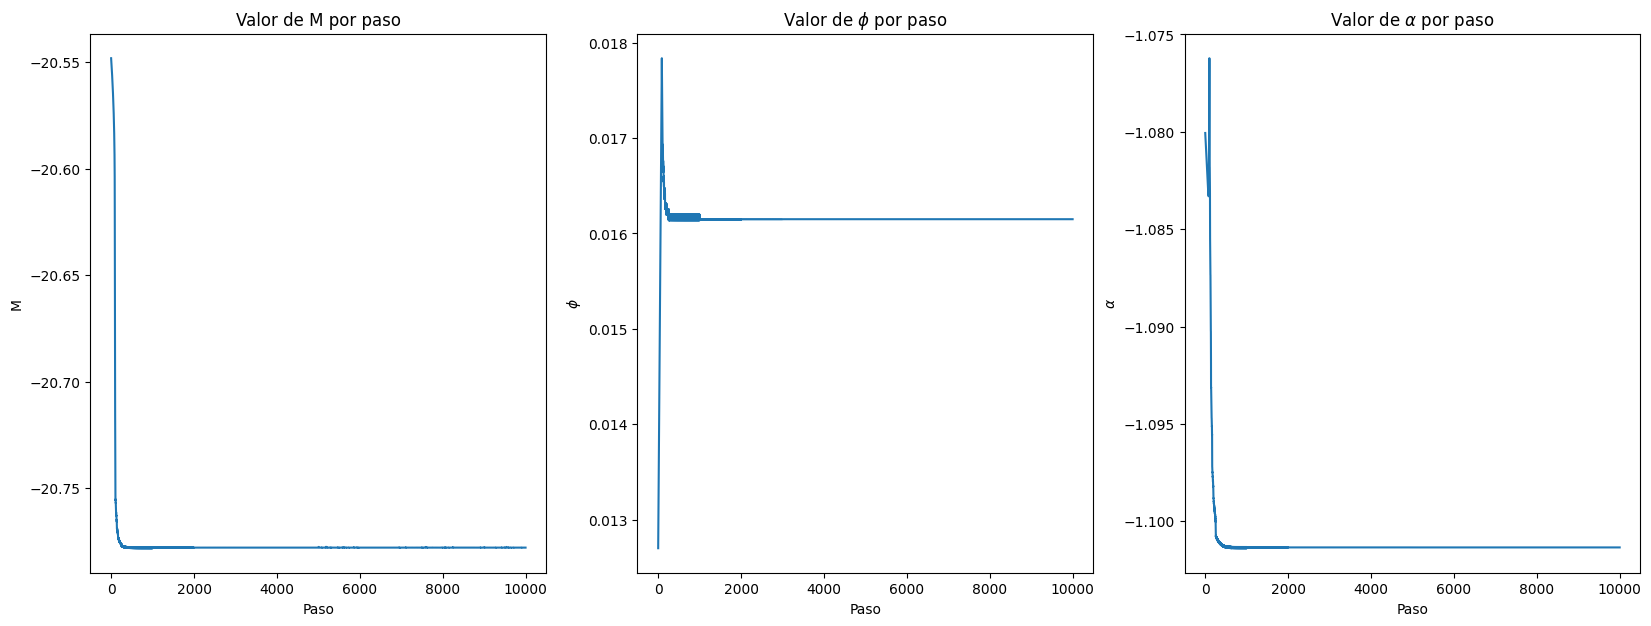

-20.777892738913554 0.016148926457433817 -1.101339800204049
9.150285951130524e-12 1.670769640673524e-16 2.434032911566074e-15


In [65]:
f, axs = plt.subplots(1, 3, figsize=(20, 7))

#Valor por cada paso
axs[0].plot(mrec)
axs[0].set_xlabel('Paso')
axs[0].set_ylabel('M')
axs[0].set_title('Valor de M por paso')

axs[1].plot(phirec)
axs[1].set_xlabel('Paso')
axs[1].set_ylabel('$\phi$')
axs[1].set_title('Valor de $\phi$ por paso')

axs[2].plot(alpharec)
axs[2].set_xlabel('Paso')
axs[2].set_ylabel('$\\alpha$')
axs[2].set_title('Valor de $\\alpha$ por paso')

plt.show()


Mmed = np.mean(mrec[-8000:])
phimed = np.mean(phirec[-8000:])
alphamed = np.mean(alpharec[-8000:])
print(Mmed, phimed, alphamed)

Mvari	= np.var(mrec[-8000:])
phivari = np.var(phirec[-8000:])
alphavari = np.var(alpharec[-8000:])

Merror = Mvari/np.sqrt(8000)
phierror = phivari/np.sqrt(8000)
alphaerror = alphavari/np.sqrt(8000)
print(Merror, phierror, alphaerror)

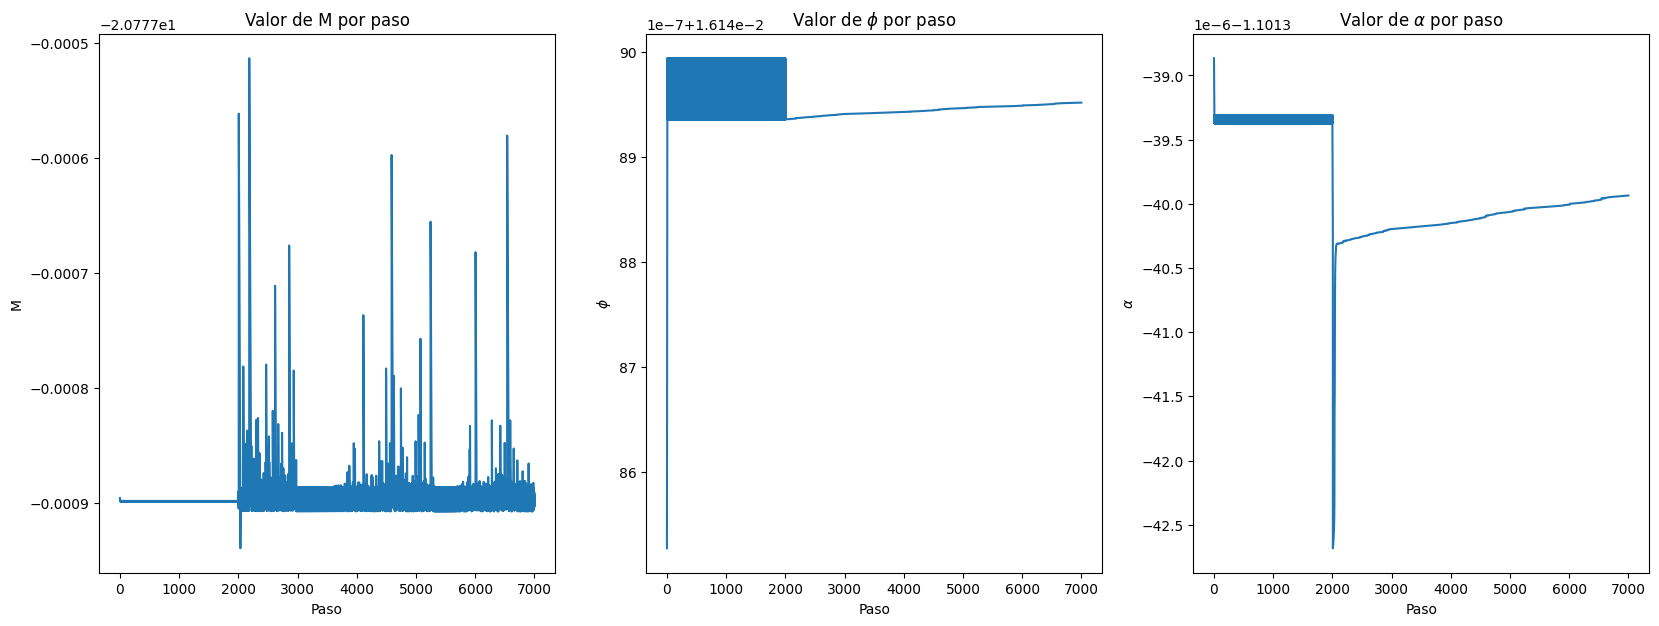

In [71]:
f, axs = plt.subplots(1, 3, figsize=(20, 7))

#Valor por cada paso
axs[0].plot(mrec[-7000:])
axs[0].set_xlabel('Paso')
axs[0].set_ylabel('M')
axs[0].set_title('Valor de M por paso')

axs[1].plot(phirec[-7000:])
axs[1].set_xlabel('Paso')
axs[1].set_ylabel('$\phi$')
axs[1].set_title('Valor de $\phi$ por paso')

axs[2].plot(alpharec[-7000:])
axs[2].set_xlabel('Paso')
axs[2].set_ylabel('$\\alpha$')
axs[2].set_title('Valor de $\\alpha$ por paso')

plt.show()


/tmp/ipykernel_5222/2322238854.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()
/tmp/ipykernel_5222/2322238854.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend()
/tmp/ipykernel_5222/2322238854.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[2].legend()


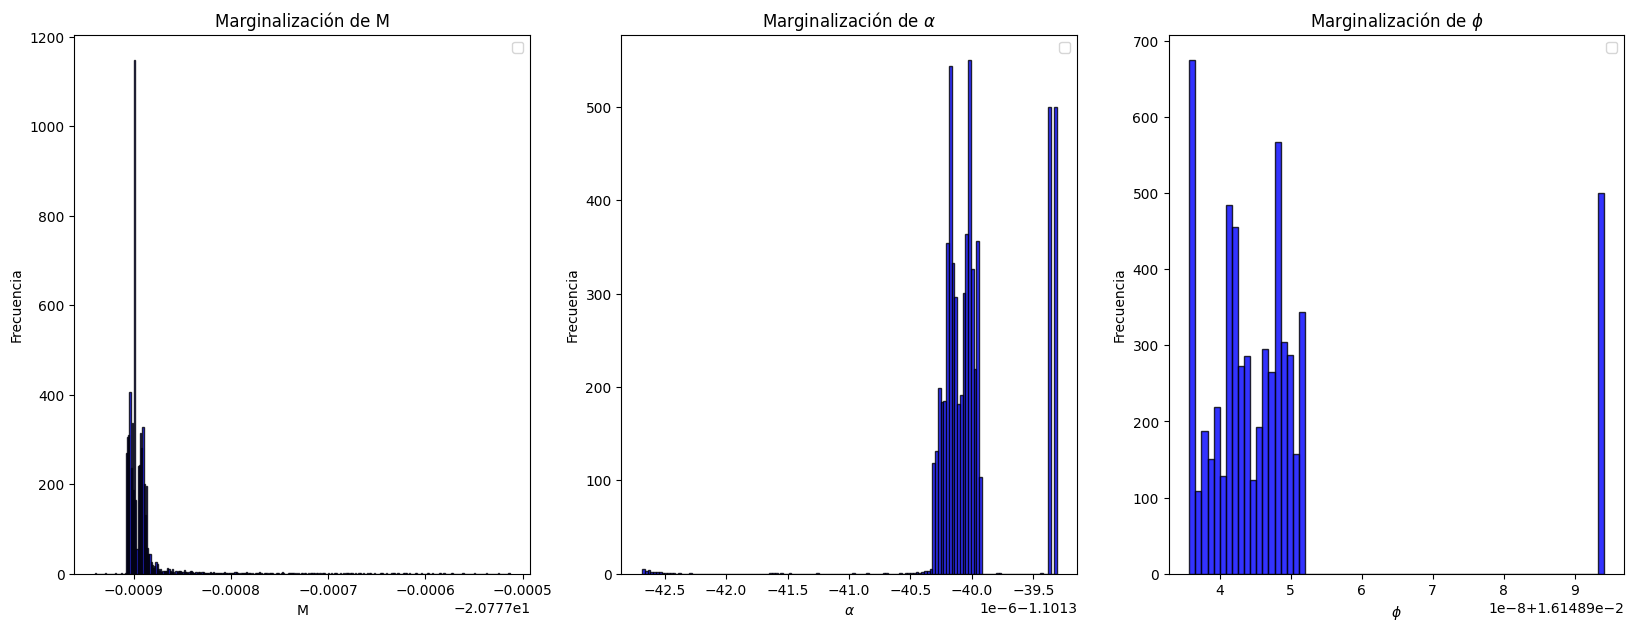

In [68]:
f, axs = plt.subplots(1, 3, figsize=(20, 7))

# Histograma de M
axs[0].hist(mrec[-6000:], color='blue', alpha=0.8, edgecolor='black', bins='auto')
axs[0].set_xlabel('M')
axs[0].set_ylabel('Frecuencia')
axs[0].set_title('Marginalización de M')
axs[0].legend()

# Histograma de alpha
axs[1].hist(alpharec[-6000:], color='blue', alpha=0.8, edgecolor='black', bins='auto')
axs[1].set_xlabel('$\\alpha$')
axs[1].set_ylabel('Frecuencia')
axs[1].set_title('Marginalización de $\\alpha$')
axs[1].legend()

# Histograma de phi
axs[2].hist(phirec[-6000:], color='blue', alpha=0.8, edgecolor='black', bins='auto')
axs[2].set_xlabel('$\\phi$')
axs[2].set_ylabel('Frecuencia')
axs[2].set_title('Marginalización de $\\phi$')
axs[2].legend()

plt.show()